In [2]:
# Find an analytic solution to the problem

from sympy import symbols, Eq, nonlinsolve, sin, cos, pi, S
a_vx, a_vy, a_m, ahat_vx, ahat_vy =  symbols("a_vx, a_vy, a_m, ahat_vx, ahat_vy")
b_vx, b_vy, b_m, bhat_vx, bhat_vy =  symbols("b_vx, b_vy, b_m, bhat_vx, bhat_vy")
c_vx, c_vy, c_m, chat_vx, chat_vy =  symbols("c_vx, c_vy, c_m, chat_vx, chat_vy")

# conservation of energy
a_m, b_m, c_m = 1, 1, 1
a_vx, b_vx, c_vx = 1, 0, 0
a_vy, b_vy, c_vy = S(0), S(0), S(0)
energy_before = a_m * (a_vx**2 + a_vy**2) / 2 + b_m * (b_vx**2 + b_vy**2) / 2 + c_m * (c_vx**2 + c_vy**2) / 2
energy_after = a_m * (ahat_vx**2 + ahat_vy**2) / 2 + b_m * (bhat_vx**2 + bhat_vy**2) / 2 + c_m * (chat_vx**2 + chat_vy**2) / 2
eq1 = Eq(energy_before*2, energy_after*2)
# conservation of momentum
eq2 = Eq(a_m * a_vx + b_m * b_vx + c_m * c_vx, a_m * ahat_vx + b_m * bhat_vx + c_m * chat_vx)
eq3 = Eq(a_m * a_vy + b_m * b_vy + c_m * c_vy, a_m * ahat_vy + b_m * bhat_vy + c_m * chat_vy)

# always 30 degrees up or down
eq4 = Eq(bhat_vx / cos(pi/6), bhat_vy / sin(pi/6))
eq5 = Eq(chat_vx / cos(-pi/6), chat_vy / sin(-pi/6))

minipool = nonlinsolve([eq1, eq2, eq3, eq4, eq5], [ahat_vx, bhat_vx, bhat_vy, chat_vx, chat_vy])
minipool

{(-(3*sqrt(1 - 5*ahat_vy**2) - 2)/5, -sqrt(3)*ahat_vy/2 + 3*sqrt(1 - 5*ahat_vy**2)/10 + 3/10, -ahat_vy/2 + sqrt(3 - 15*ahat_vy**2)/10 + sqrt(3)/10, sqrt(3)*ahat_vy/2 + 3*sqrt(1 - 5*ahat_vy**2)/10 + 3/10, -ahat_vy/2 - sqrt(3)*sqrt(1 - 5*ahat_vy**2)/10 - sqrt(3)/10), ((3*sqrt(1 - 5*ahat_vy**2) + 2)/5, -sqrt(3)*ahat_vy/2 - 3*sqrt(1 - 5*ahat_vy**2)/10 + 3/10, -ahat_vy/2 - sqrt(3 - 15*ahat_vy**2)/10 + sqrt(3)/10, sqrt(3)*ahat_vy/2 - 3*sqrt(1 - 5*ahat_vy**2)/10 + 3/10, -ahat_vy/2 + sqrt(3)*sqrt(1 - 5*ahat_vy**2)/10 - sqrt(3)/10)}

In [35]:
minipool0 = list(minipool)[0]
minipool1 = list(minipool)[1]
vx, _, _, _, _ = minipool0
vx1, _, _, _, _ = minipool1
vx

-(3*sqrt(1 - 5*ahat_vy**2) - 2)/5

In [6]:
import sympy as sp

a = sp.Symbol("a", real=True)
vx_as_a = sp.im(vx).subs(sp.im(ahat_vy), 0).subs(sp.re(ahat_vy), a)
vx_as_a

vx_solve = sp.solve(vx_as_a, a)
print(vx_solve)

[-sqrt(5)/5, sqrt(5)/5]


In [11]:
[vx.subs(ahat_vy, s) for s in vx_solve]

[2/5, 2/5]

In [25]:
import sympy as sp

vy = sp.solve(Eq(vx, ahat_vx), ahat_vy)
vy[0]

-sqrt(-5*ahat_vx**2 + 4*ahat_vx + 1)/3

In [23]:
vx

-(3*sqrt(1 - 5*ahat_vy**2) - 2)/5

In [27]:
print(Eq(vx, ahat_vx))

Eq(-(3*sqrt(1 - 5*ahat_vy**2) - 2)/5, ahat_vx)


In [31]:
vx.subs(ahat_vy, "y")

2/5 - 3*sqrt(1 - 5*y**2)/5

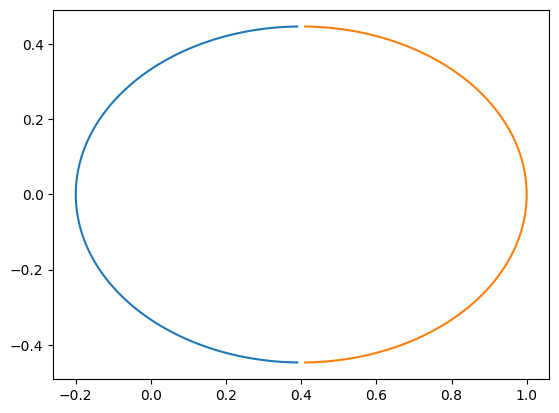

In [38]:
import numpy as np
import matplotlib.pyplot as plt

y = np.linspace(-1, 1, 10_000)
x = []
x1 = []
for yi in y:
    xi = vx.subs(ahat_vy, yi)
    x.append(complex(xi))
    xi1 = vx1.subs(ahat_vy, yi)
    x1.append(complex(xi1))
x = np.array(x)
x1 = np.array(x1)

# filter out complex numbers
is_real = np.isreal(x)
plt.plot(x[is_real], y[is_real])
is_real = np.isreal(x1)
plt.plot(x1[is_real], y[is_real])



In [41]:
sp.simplify(vx**2)

(3*sqrt(1 - 5*ahat_vy**2) - 2)**2/25

In [44]:
vy[0]**2

-5*ahat_vx**2/9 + 4*ahat_vx/9 + 1/9

In [52]:
import sympy as sp

x, y, h, k, a, b = sp.symbols('x y h k a b')

# Ellipse equation (axis-aligned)
ellipse_eq = ((x - h)**2 / a**2) + ((y - k)**2 / b**2) - 1

y_points = [S(-3)/10, S(-2)/10, S(-1)/10, S(0)/10]
# Known points (replace these with your actual points)
point0 = (vx.subs(ahat_vy, y_points[0]), y_points[0])
point1 = (vx.subs(ahat_vy, y_points[1]), y_points[1])
point2 = (vx.subs(ahat_vy, y_points[2]), y_points[2])
point3 = (vx.subs(ahat_vy, y_points[3]), y_points[3])

# print(point0)

# Create equations for each point
eq1 = ellipse_eq.subs({x: point1[0], y: point1[1]})
eq2 = ellipse_eq.subs({x: point2[0], y: point2[1]})
eq3 = ellipse_eq.subs({x: point3[0], y: point3[1]})
eq4 = ellipse_eq.subs({x: point4[0], y: point4[1]})

# Solve the system of equations
ellipse_params = sp.solve((eq1, eq2, eq3, eq4), (h, k, a, b))
ellipse_params

# # Substitute the parameters into the ellipse equation
# ellipse_result = sp.Eq(ellipse_eq.lhs.subs(ellipse_params), ellipse_eq.rhs)

# print("Ellipse equation:", ellipse_result)
